In [1]:
import librosa
import numpy as np
from os.path import isfile,join
from os import listdir
import matplotlib.pyplot as plt
from scipy import hamming
import soundfile as sf
import scipy
import numpy
from python_speech_features import mfcc
from scipy.io import wavfile
import soundfile as sf
import math
import tensorflow
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import model_from_yaml
from keras.models import model_from_json
from keras.layers import Dense
from keras import backend
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [2]:
babycry=[f for f in listdir('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Crying') if isfile(join('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Crying', f))]

nonbabycry=[f for f in listdir('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Noise') if isfile(join('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Noise', f))]

babysilence=[f for f in listdir('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Silence') if isfile(join('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Silence', f))]

babylaugh=[f for f in listdir('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Laugh') if isfile(join('D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Laugh',f))]


In [3]:
baby_cry=[]
for each in range(0,len(babycry)) :
    cry='D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Crying' + '\\' + babycry[each] 
    baby_cry.append(cry)


In [4]:
len(baby_cry)

549

In [5]:
non_babycry=[]
for each in range(0,len(nonbabycry)) :
    x='D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Noise' + '\\' + nonbabycry[each] 
    non_babycry.append(x)

In [6]:
len(non_babycry)

183

In [7]:
baby_silence=[]
for each in range(0,len(babysilence)) :
    silence='D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Silence' + '\\' + babysilence[each] 
    baby_silence.append(silence)


In [8]:
baby_laugh=[]
for each in range(0,len(babylaugh)) :
    laugh='D:\\HK2-Năm 3\\PBL5\\Code\\data\\normalized\\Laugh' + '\\' + babylaugh[each] 
    baby_laugh.append(laugh)
  

In [9]:
nonbaby_cry=baby_silence+baby_laugh+non_babycry

In [10]:
len(nonbaby_cry)

553

In [11]:
def Mfcc(audiofile):
    s,r=sf.read(audiofile)
    
    x=np.array_split(s,128)
    
    logg=np.zeros((128,12))
    for i in range(len(x)):
        
        m=np.mean(mfcc(x[i],r, numcep=12,nfft=2048),axis=0)
        logg[i,:]=m

    return logg


In [12]:
r=Mfcc(baby_cry[10])

In [13]:
np.shape(r)

(128, 12)

In [14]:
data=np.zeros((len(nonbaby_cry) + len(baby_cry),128,12))
output=[]
for i in range(0,len(baby_cry)):
       r=Mfcc(baby_cry[i])
       
       data[i,:,:]=r
       output.append(1) 
        
all=baby_cry+nonbaby_cry
for i in range(len(baby_cry)-1,len(all)-1):
 
       r=Mfcc(all[i])
       
       data[i,:,:]=r
       output.append(0)  

In [15]:
len(data)

1102

In [16]:
input=data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(input, output, test_size=0.3, random_state=None,stratify = output)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None,stratify = y_temp)

In [18]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)
print('Length of y_train:',len(y_train))


Shape of X_train: (771, 128, 12)
Shape of X_val: (165, 128, 12)
Shape of X_test: (166, 128, 12)
Length of y_train: 771


In [19]:
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D,Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dropout
from keras import optimizers, callbacks
import numpy as np
from keras.layers import Dense,Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization
from keras.optimizers import Adam

In [20]:


model1 = Sequential()
model1.add(Conv1D(64, 2, activation='relu', input_shape=(128, 12))) 
model1.add(Conv1D(40,2,padding='valid', activation='relu',strides=1)) 
model1.add(Dropout(0.2))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(40))
model1.add(Dropout(0.2))
model1.add(Activation('relu'))
model1.add(BatchNormalization(epsilon=0.001, momentum=0.9, weights=None))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))



In [21]:

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_val)
validation_y = np.asarray(y_val)
history = model1.fit(train_x, train_y, epochs=100, validation_data=(validation_x,validation_y),batch_size=10, shuffle=False,verbose=2)


Epoch 1/100
78/78 - 3s - loss: 0.6396 - accuracy: 0.6200 - val_loss: 0.4598 - val_accuracy: 0.7879 - 3s/epoch - 34ms/step
Epoch 2/100
78/78 - 0s - loss: 0.4676 - accuracy: 0.7821 - val_loss: 0.4105 - val_accuracy: 0.7818 - 444ms/epoch - 6ms/step
Epoch 3/100
78/78 - 1s - loss: 0.3907 - accuracy: 0.8275 - val_loss: 0.3618 - val_accuracy: 0.8485 - 534ms/epoch - 7ms/step
Epoch 4/100
78/78 - 1s - loss: 0.3167 - accuracy: 0.8612 - val_loss: 0.2854 - val_accuracy: 0.9212 - 530ms/epoch - 7ms/step
Epoch 5/100
78/78 - 1s - loss: 0.2795 - accuracy: 0.8949 - val_loss: 0.2506 - val_accuracy: 0.9152 - 538ms/epoch - 7ms/step
Epoch 6/100
78/78 - 0s - loss: 0.2605 - accuracy: 0.9144 - val_loss: 0.2305 - val_accuracy: 0.9273 - 448ms/epoch - 6ms/step
Epoch 7/100
78/78 - 0s - loss: 0.2064 - accuracy: 0.9300 - val_loss: 0.1966 - val_accuracy: 0.9515 - 479ms/epoch - 6ms/step
Epoch 8/100
78/78 - 0s - loss: 0.1899 - accuracy: 0.9222 - val_loss: 0.1797 - val_accuracy: 0.9333 - 479ms/epoch - 6ms/step
Epoch 9/10

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


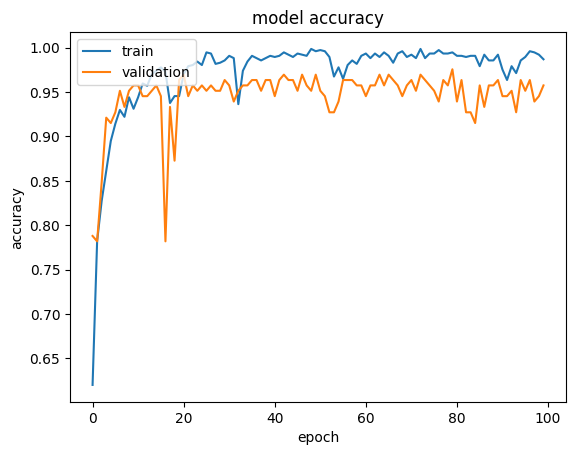

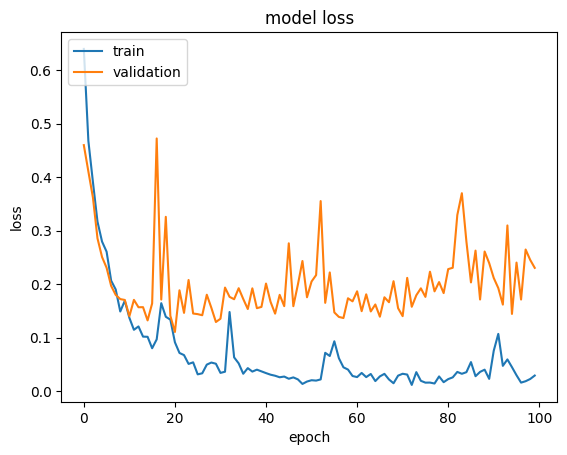

In [23]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:

model1.evaluate(validation_x,validation_y)

6/6 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.9576


[0.23031091690063477, 0.9575757384300232]

6/6 [==============================] - 0s 5ms/step


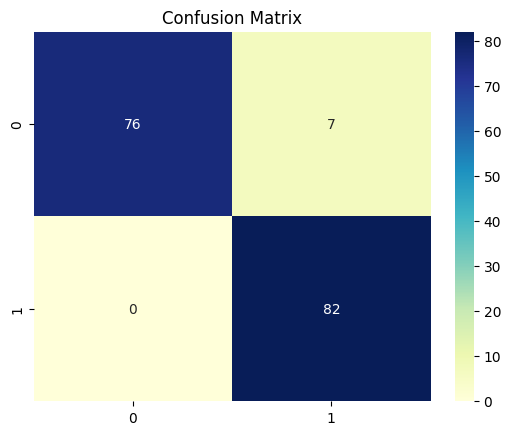

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model1.predict(validation_x)
y_pred = np.where(y_pred >= 0.5, 1, 0)

cm = confusion_matrix(validation_y, y_pred)

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")

plt.show()

In [26]:
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

# Tính recall
recall = TP / (TP + FN)
print("Recall:", recall)

# Tính precision
precision = TP / (TP + FP)
print("Precision:", precision)

Recall: 1.0
Precision: 0.9213483146067416


In [27]:
test_x = np.asarray(X_test)
test_y = np.asarray(y_test)
model1.evaluate(test_x,test_y)

6/6 [==============================] - 0s 4ms/step - loss: 0.3442 - accuracy: 0.9458


[0.34423190355300903, 0.9457831382751465]

6/6 [==============================] - 0s 3ms/step


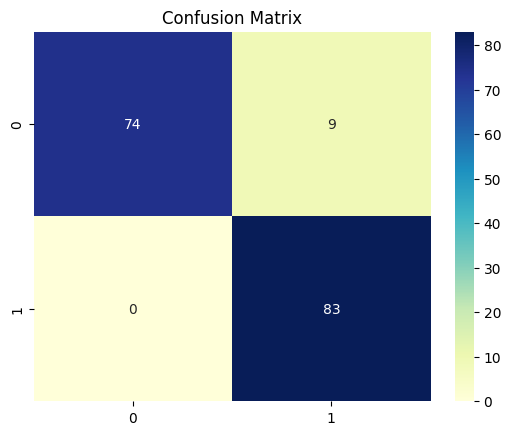

In [28]:
y_pred = model1.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

cm = confusion_matrix(test_y, y_pred)

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")

plt.show()

In [29]:
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

# Tính recall
recall = TP / (TP + FN)
print("Recall:", recall)

# Tính precision
precision = TP / (TP + FP)
print("Precision:", precision)

Recall: 1.0
Precision: 0.9021739130434783


In [30]:
from sklearn import svm

train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_val)
validation_y = np.asarray(y_val)
test_x = np.asarray(X_test)
test_y = np.asarray(y_test)
n_samples = train_x.shape[0]
n_features = train_x.shape[1] * train_x.shape[2]
train_x = train_x.reshape(n_samples, n_features)
# Set parameters for SVM
C = 25
kernel = 'rbf'
svm_classifier = svm.SVC(C=C, kernel=kernel, gamma=0.001)

svm_classifier.fit(train_x, train_y)

SVC(C=25, gamma=0.001)

In [31]:
n_samples = test_x.shape[0]
n_features = test_x.shape[1] * test_x.shape[2]
test_x = test_x.reshape(n_samples, n_features)
accuracy = svm_classifier.score(test_x,test_y)
print(accuracy)

0.5


In [32]:
n_samples = validation_x.shape[0]
n_features = validation_x.shape[1] * validation_x.shape[2]
validation_x = validation_x.reshape(n_samples, n_features)
accuracy = svm_classifier.score(validation_x,validation_y)
print(accuracy)

0.503030303030303


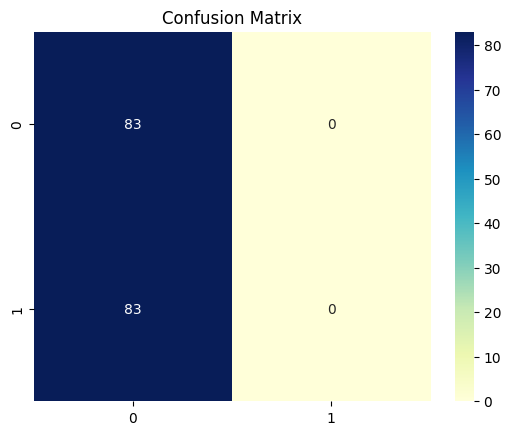

In [33]:
y_pred = svm_classifier.predict(test_x)
y_pred = np.where(y_pred >= 0.5, 1, 0)

cm = confusion_matrix(test_y, y_pred)

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")

plt.show()

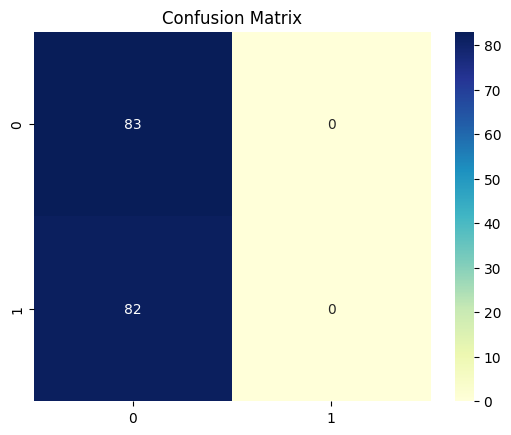

In [34]:
y_pred = svm_classifier.predict(validation_x)
y_pred = np.where(y_pred >= 0.5, 1, 0)

cm = confusion_matrix(validation_y, y_pred)

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")

plt.show()